# Result Analysis

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [129]:
result_path = './Results/results.csv'

In [156]:
# Read data 
df = pd.read_csv(result_path)
df.head()

,model_name,model_details,total_file_used,ngram,use_idf,accuracy,precision,recall,f1_score,analyzer,total_features,training_time,test_time
0,LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",100,1,False,0.919915,0.929886,0.919915,0.921769,word,313473,4.531918,0.459492
1,LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",100,2,False,0.918231,0.930088,0.918231,0.920593,word,2294420,24.107120,0.880081
2,LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",100,3,False,0.917701,0.929740,0.917701,0.920087,word,5586569,59.282656,1.234382
3,LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",100,4,False,0.917557,0.929657,0.917557,0.919957,word,9384309,110.036503,1.620134
4,LogisticRegression,"LogisticRegression(C=1.0, class_weight=None, d...",100,5,False,0.917605,0.929724,0.917605,0.920013,word,13343183,162.903847,1.788915


We have 30 results. We will explore how accuracy, precision , recall and f1_score varied according to different variables.

In [182]:
# Using parallel coordinates for comparitive analyasis
from pandas.plotting import parallel_coordinates

We can explore how using and not using idf has affected accuracy, precision, recall and f1_score. We can see that use of idf resulted in significant imporvement.

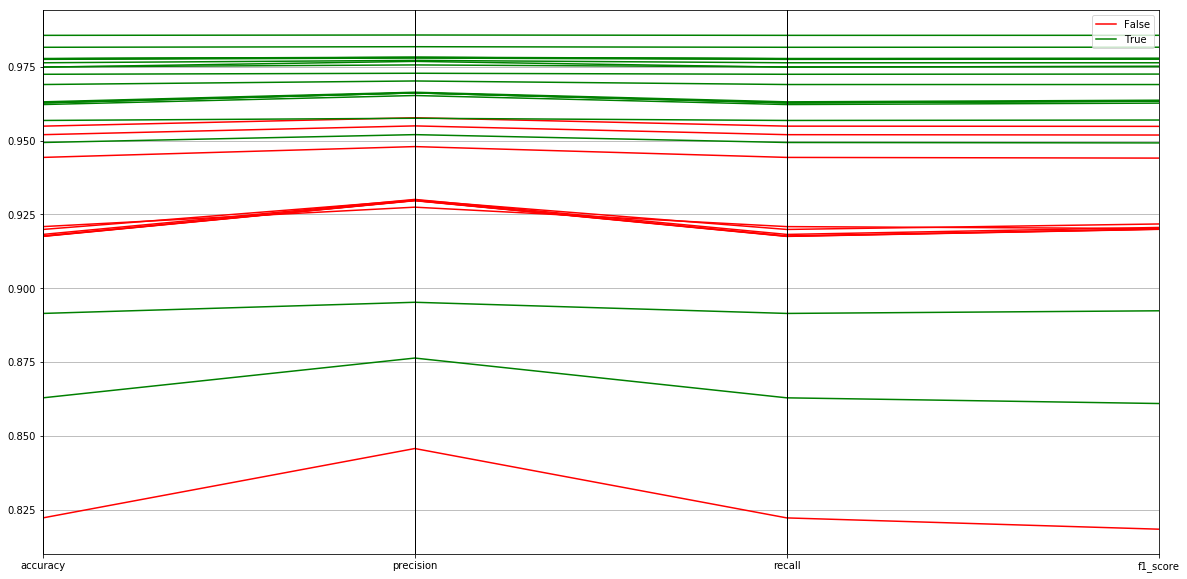

In [183]:
df1 = df[['use_idf','accuracy','precision','recall','f1_score']]
plt.figure(figsize=(20,10))
parallel_coordinates(df1, 'use_idf',color=['Red','Green'])
plt.show()

We can also analyse the use of ngram and results of model. We can observe that 4-gram and 5-gram generally has better results ( without regarding algorithmused, and analyzer( char or word))

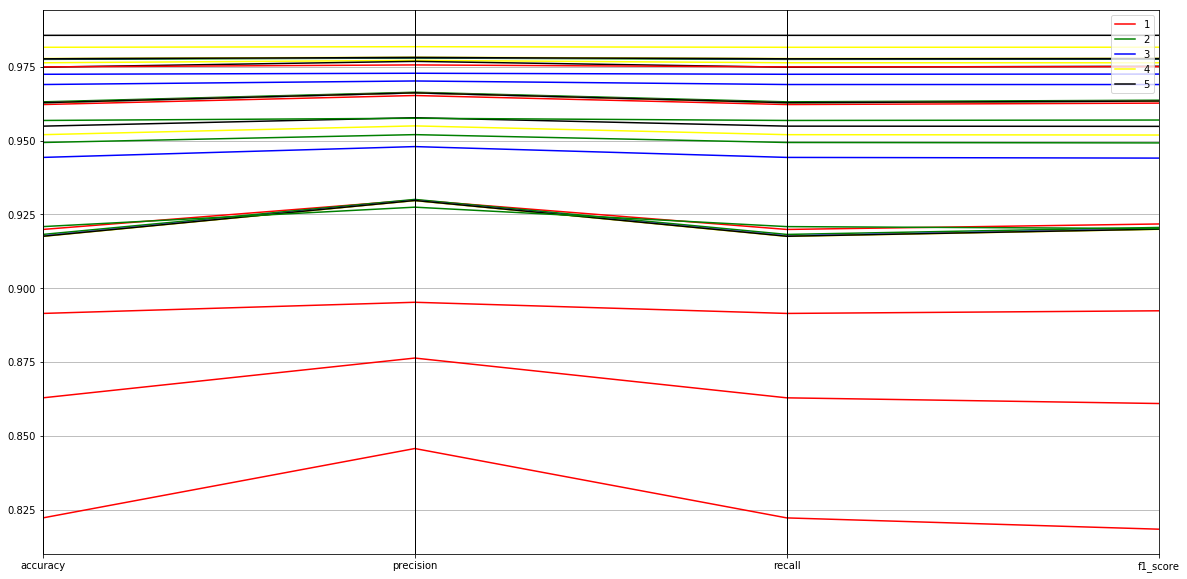

In [139]:
df2 = df.loc[df['use_idf'] == True]
df2 = df[['ngram','accuracy','precision','recall','f1_score']]
plt.figure(figsize=(20,10))
parallel_coordinates(df2, 'ngram',color=['red','green','blue','yellow','black'])
plt.show()

We can also analyse how different models performed. From the graph we can observe that SVM has better performance than logistic regression.

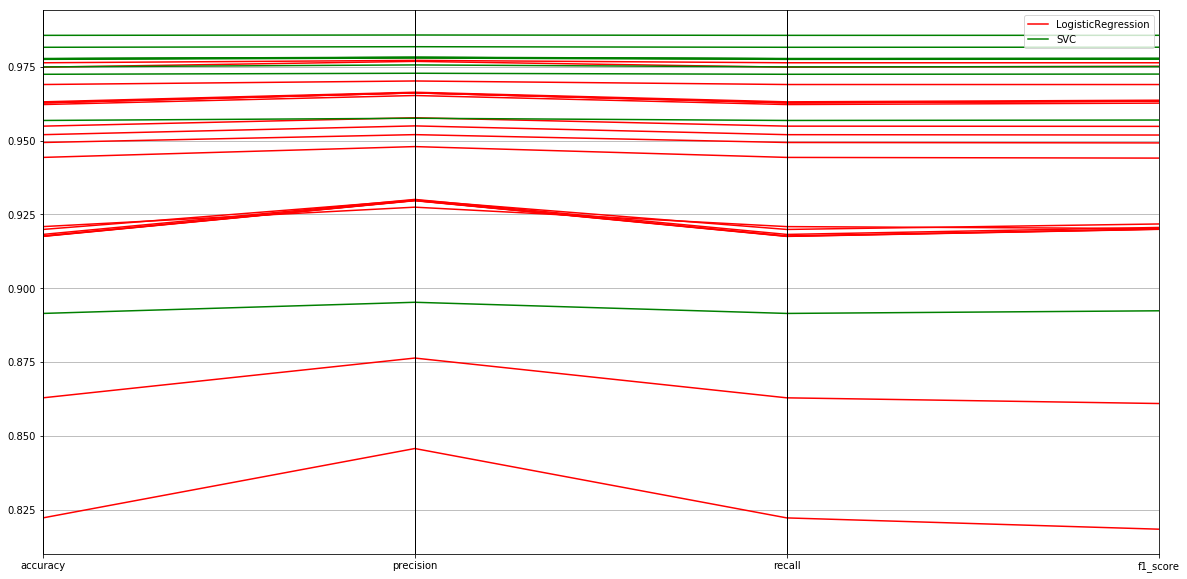

In [140]:
df3 = df.loc[df['use_idf'] == True]
df3 = df[['model_name','accuracy','precision','recall','f1_score']]
plt.figure(figsize=(20,10))
parallel_coordinates(df3, 'model_name',color=['red','green','blue','yellow','black'])
plt.show()

We can also analyse how using character or word ngram affected in result. From the graph we can observe that model using word gram has more consistent performance. Models with char analyzer can perform better than model with word ngram when other parameters are tweaked.

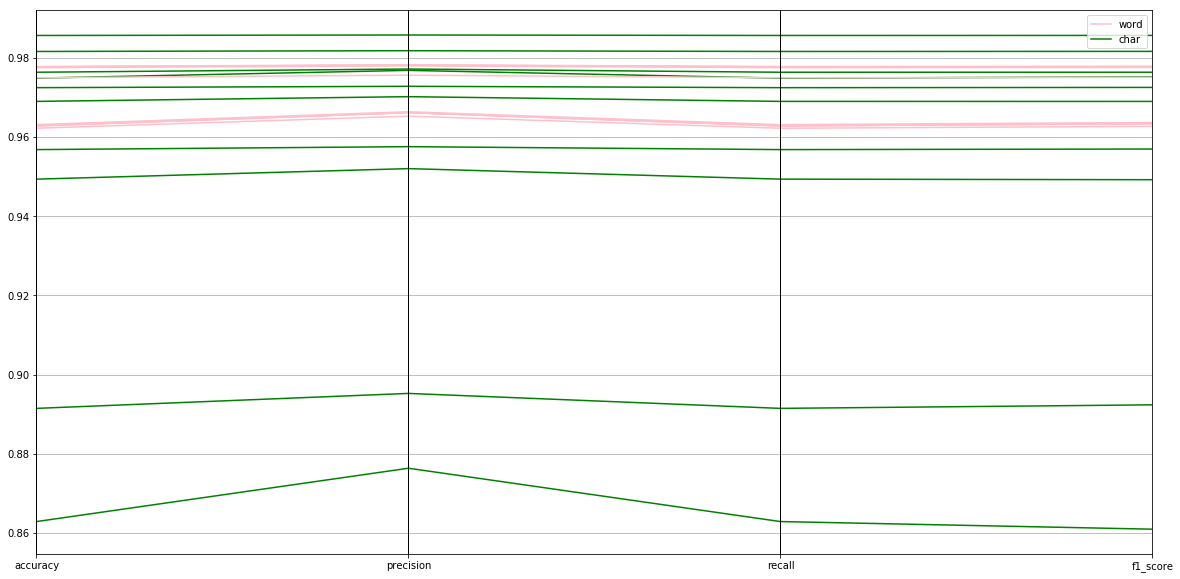

In [162]:
df4 = df.loc[df['use_idf'] == True]
df4 = df4[['analyzer','accuracy','precision','recall','f1_score']]
plt.figure(figsize=(20,10))
parallel_coordinates(df4, 'analyzer',color=['pink','green'])
plt.show()

We will now find the best model ( based on accuracy) among our 30 models.

In [184]:
figsize=(20,10)
df5 = df[['model_name','accuracy']].sort_values(by='accuracy', ascending=False)
df5.head()

,model_name,accuracy
29,SVC,0.985658
28,SVC,0.981615
23,SVC,0.977813
24,SVC,0.977717
22,SVC,0.977717


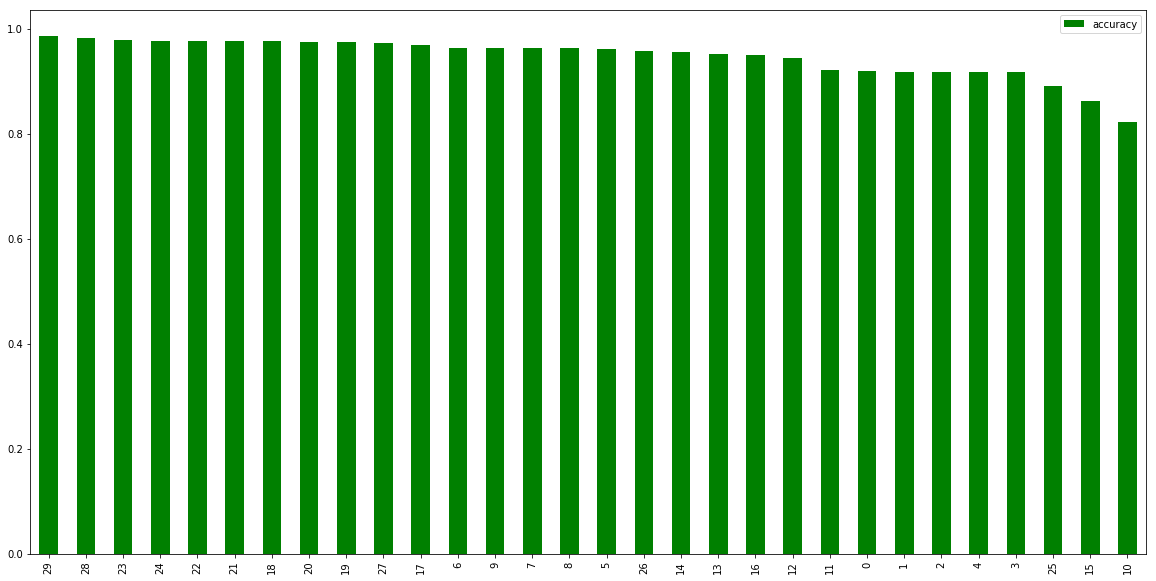

In [185]:
df5.plot.bar(figsize=figsize, color = 'green')

Model based on 5 gram svm using idf resulted in highest accuracy.

In [181]:
best_model = df.ix[29]
best_model

model_name                                                       SVC
model_details      SVC(C=1.0, cache_size=200, class_weight=None, ...
total_file_used                                                  100
ngram                                                              5
use_idf                                                         True
accuracy                                                    0.985658
precision                                                   0.985774
recall                                                      0.985658
f1_score                                                    0.985671
analyzer                                                        char
total_features                                               1283035
training_time                                                54.7344
test_time                                                    76.8203
Name: 29, dtype: object

We can also find the model which took longest to train

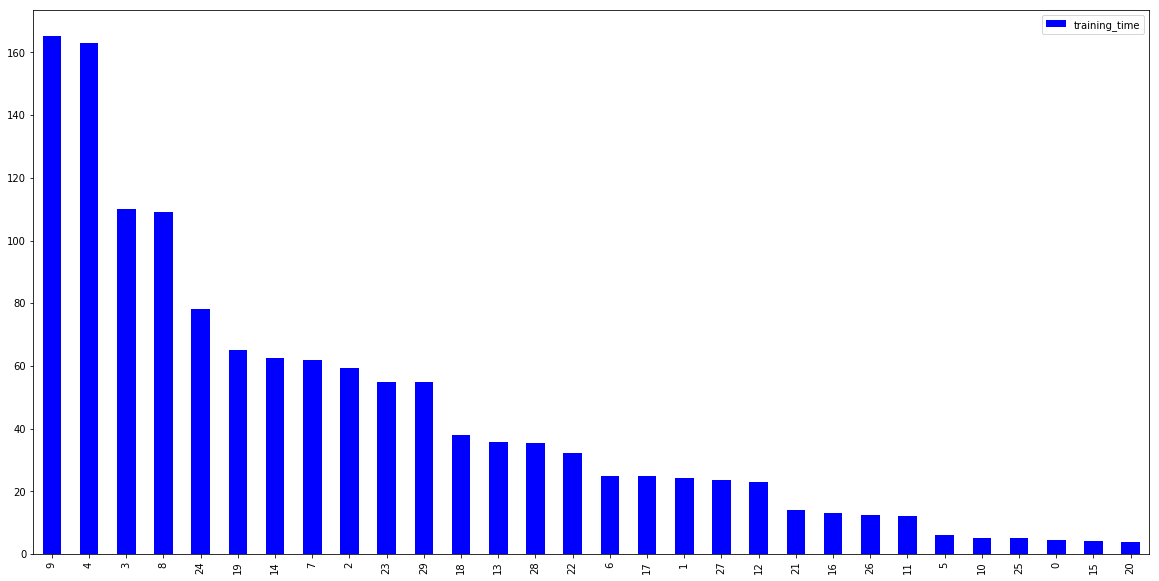

In [150]:
df6 = df[['model_name','training_time']].sort_values(by='training_time', ascending=False)

df6.plot.bar(figsize=figsize, color = 'blue')

5 gram word based Logistic regression using idf took the longest time. Our best model was 11th slowest model to train

In [186]:
slowest_to_train = df.ix[9]
slowest_to_train 

model_name                                        LogisticRegression
model_details      LogisticRegression(C=1.0, class_weight=None, d...
total_file_used                                                  100
ngram                                                              5
use_idf                                                         True
accuracy                                                    0.962845
precision                                                   0.966192
recall                                                      0.962845
f1_score                                                    0.963416
analyzer                                                        word
total_features                                              13343183
training_time                                                 165.13
test_time                                                    2.08555
Name: 9, dtype: object

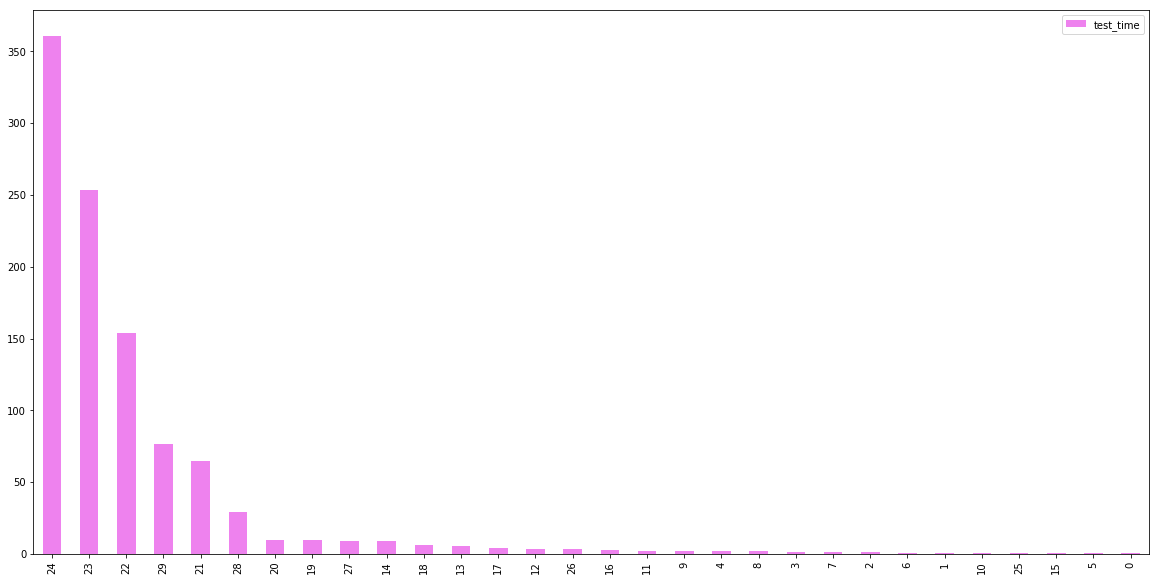

In [188]:
df7 = df[['model_name','test_time']].sort_values(by='test_time', ascending=False)

df7.plot.bar(figsize=figsize, color = 'violet')

In [187]:
slowest_to_test = df.ix[24]
slowest_to_test

model_name                                                       SVC
model_details      SVC(C=1.0, cache_size=200, class_weight=None, ...
total_file_used                                                  100
ngram                                                              5
use_idf                                                         True
accuracy                                                    0.977717
precision                                                   0.978168
recall                                                      0.977717
f1_score                                                    0.977775
analyzer                                                        word
total_features                                              13343183
training_time                                                78.2851
test_time                                                    360.412
Name: 24, dtype: object

We can also explore how accuracy and training time is related.We analyze our result for the model which used idf and ngram of character as an analyzer. From the scatter plot we can observe that model with higher accuracy took more time to train. 

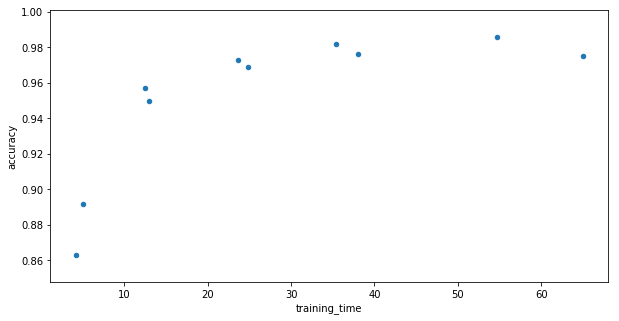

In [176]:
df8 = df.loc[(df['use_idf'] == True) & (df['analyzer'] == 'char')]
d8 = df8[['training_time','accuracy']]
d8.plot.scatter(x='training_time',y='accuracy',figsize=(10,5))

We can also explore how accuracy and test time is related.We can analyse our result in a similar setting as above. The relation are not very obvious but we can see that model having higher accuracy takes more time to make prediction.

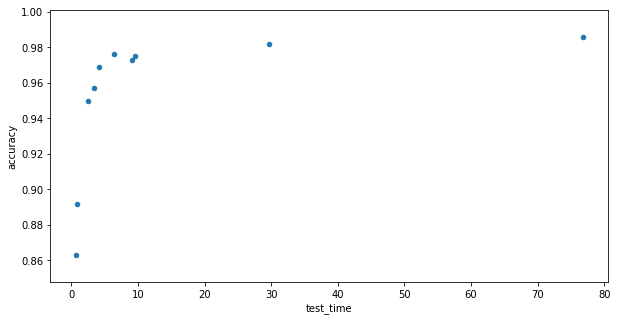

In [178]:
df9 = df.loc[(df['use_idf'] == True) & (df['analyzer'] == 'char')]
d9 = df9[['test_time','accuracy']]
d9.plot.scatter(x='test_time',y='accuracy',figsize=(10,5))